# New York TAXI Fare Prediction

Kaggle competition:

https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview

Based on:

https://jovian.com/aakashns/nyc-taxi-fare-prediction-filled

## Setup

Run new_york_taxi.ipynb first to get the preprocessed dataset

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import RegressionExperiment

In [ ]:
COMPETITION_NAME = "new-york-city-taxi-fare-prediction"
BASE_PATH = Path(f"../data/{COMPETITION_NAME}")

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
sns.set_palette("Set2")

In [3]:
df = pd.read_parquet(BASE_PATH / "train_preprocessed.parquet")
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,12.9,2009-07-16 20:33:00+00:00,-73.980759,40.680557,-73.989113,40.726788,2.0,5.182160,20.206925,11.201392,16.204168,6.238883,2.359456
1,5.3,2010-01-26 14:55:00+00:00,-73.993088,40.752003,-73.980339,40.764830,1.0,1.785494,21.915706,9.077273,18.412888,2.170614,6.314706
2,5.0,2014-01-10 08:16:07+00:00,-73.982140,40.772705,-73.988693,40.774325,1.0,0.581786,23.128467,9.686609,18.305651,2.224665,7.084651
3,7.3,2010-06-26 09:59:00+00:00,-73.999626,40.743546,-73.989273,40.756862,2.0,1.717924,21.982317,9.983750,17.345084,3.333171,5.214932
4,6.0,2012-12-08 23:27:00+00:00,-74.003502,40.738747,-73.993317,40.752022,3.0,1.706839,21.955772,10.446317,16.808958,3.963512,4.596439


## Experiment 1

In [4]:
exp1 = RegressionExperiment()

exp1.setup(
    df, 
    target="fare_amount",
    # preprocess=False,
    # fix_imbalance=True,
    # normalize=True,
    date_features=["pickup_datetime"],
    create_date_columns=["day", "month", "year", "weekday", "hour"],
    session_id=42,
    n_jobs=4,
    use_gpu=False
)

,Description,Value
0,Session id,42
1,Target,fare_amount
2,Target type,Regression
3,Original data shape,"(539486, 13)"
4,Transformed data shape,"(539486, 17)"
5,Transformed train set shape,"(377640, 17)"
6,Transformed test set shape,"(161846, 17)"
7,Numeric features,11
8,Date features,1
9,Preprocess,True


In [5]:
pd.set_option("display.max_columns", None)
exp1.get_config("X_transformed")

,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
137187,11,1,2010,5,4,-73.977135,40.738941,-73.992218,40.749184,1.0,1.707763,21.703617,10.445608,16.766729,4.154872,4.328399
443288,11,2,2009,7,22,-73.965111,40.760525,-73.908882,40.765991,1.0,4.786370,17.717094,3.184283,23.993469,4.821344,10.390394
249101,17,0,2011,7,4,-73.967422,40.760338,-73.959274,40.771275,1.0,1.395684,21.041229,7.226078,20.323198,0.961425,7.793371
4545,10,3,2012,6,14,-73.960625,40.778286,-73.954468,40.786652,1.0,1.064530,21.968731,6.878240,21.489910,1.091725,9.462555
30743,1,5,2014,6,14,-73.985428,40.726864,-73.993851,40.759167,1.0,3.656981,22.445551,10.308786,17.110884,3.427166,5.345853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20470,16,4,2011,12,23,-73.952042,40.786694,-73.996956,40.753323,5.0,5.302065,22.291422,10.706617,16.590498,4.063091,4.652553
326484,12,1,2011,11,8,-73.885353,40.773121,-73.989594,40.755890,3.0,9.007003,21.941706,10.034716,17.274471,3.432394,5.104271
519734,22,3,2013,3,14,-74.017609,40.706455,-74.009819,40.724133,2.0,2.070385,21.641026,12.880284,14.438289,7.291656,1.280629
518032,16,2,2014,11,26,-73.962959,40.809513,-73.995171,40.749683,1.0,7.178879,21.942553,10.668162,16.560198,4.263378,4.302004


In [6]:
exp1_top3_models = exp1.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.6310,11.9035,3.4482,0.8657,0.2187,0.1711,11.0790
xgboost,Extreme Gradient Boosting,1.6779,12.3057,3.5062,0.8611,0.2225,0.1753,9.9430
lightgbm,Light Gradient Boosting Machine,1.7522,12.6837,3.5598,0.8568,0.2253,0.1829,0.6560
et,Extra Trees Regressor,1.7708,12.8368,3.5810,0.8551,0.2317,0.1905,26.6190
rf,Random Forest Regressor,1.7381,12.8982,3.5895,0.8544,0.2291,0.1854,100.7920
gbr,Gradient Boosting Regressor,1.8951,13.8033,3.7136,0.8442,0.2363,0.1976,52.1000
lr,Linear Regression,2.2577,18.2677,4.2720,0.7938,0.2674,0.2228,0.6050
ridge,Ridge Regression,2.2571,18.2681,4.2721,0.7938,0.2674,0.2226,0.1810
lar,Least Angle Regression,2.2577,18.2677,4.2720,0.7938,0.2674,0.2228,0.1830
br,Bayesian Ridge,2.2577,18.2677,4.2720,0.7938,0.2674,0.2227,0.3210


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [8]:
catboost = exp1.create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6381,12.0826,3.4760,0.8644,0.2195,0.1718
1,1.6321,11.4396,3.3823,0.8695,0.2183,0.1726
2,1.6457,13.8105,3.7163,0.8520,0.2207,0.1721
3,1.6436,11.9774,3.4608,0.8660,0.2214,0.1733
4,1.6352,11.3511,3.3691,0.8725,0.2210,0.1730
5,1.6212,11.7856,3.4330,0.8677,0.2192,0.1692
6,1.6020,10.8952,3.3008,0.8728,0.2146,0.1693
7,1.6382,12.3992,3.5213,0.8589,0.2183,0.1697
8,1.6326,12.3433,3.5133,0.8601,0.2184,0.1704


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
tuned_catboost = exp1.tune_model(catboost, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8496,13.2619,3.6417,0.8512,0.2337,0.1926
1,1.8645,13.4672,3.6698,0.8464,0.2345,0.1953
2,1.8656,15.8485,3.9810,0.8302,0.2352,0.1934
3,1.8582,13.7317,3.7056,0.8464,0.2350,0.1931
4,1.8432,13.0389,3.6109,0.8536,0.2338,0.1939
5,1.8427,13.5867,3.6860,0.8475,0.2346,0.1914
6,1.8128,12.6990,3.5636,0.8517,0.2293,0.1900
7,1.8519,13.8570,3.7225,0.8423,0.2315,0.1899
8,1.8474,14.1264,3.7585,0.8399,0.2330,0.1910


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [11]:
catboost.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 42,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'lea

In [12]:
catboost_preds = exp1.predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.6180,13.7092,3.7026,0.8472,0.2187,0.1709


In [16]:
catboost_preds.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,fare_amount,prediction_label
283153,2012-05-29 21:29:00+00:00,-73.969284,40.753738,-74.016060,40.709560,2.0,6.299195,21.499363,14.137947,13.574800,8.948667,0.620286,15.3,16.705051
206013,2011-10-22 19:32:53+00:00,-73.978477,40.777847,-73.980461,40.764832,1.0,1.454901,21.923962,9.087417,18.403852,2.177250,6.310943,6.9,6.190533
420783,2012-09-22 18:27:00+00:00,-73.961533,40.779770,-74.002708,40.727203,2.0,6.794764,21.248919,12.190242,15.108902,6.688166,1.731635,19.5,19.877623
65232,2010-01-06 06:31:35+00:00,-73.990524,40.757145,-73.976746,40.756775,1.0,1.164241,21.125938,8.958138,18.301794,2.760434,5.648823,4.5,5.683707
503867,2009-10-29 17:02:03+00:00,-73.948769,40.782288,-73.950172,40.775490,2.0,0.764116,20.820566,6.432316,21.219917,1.182369,8.615232,3.7,4.726686


In [13]:
catboost.get_params()

{'loss_function': 'RMSE',
 'border_count': 254,
 'thread_count': 4,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 42}

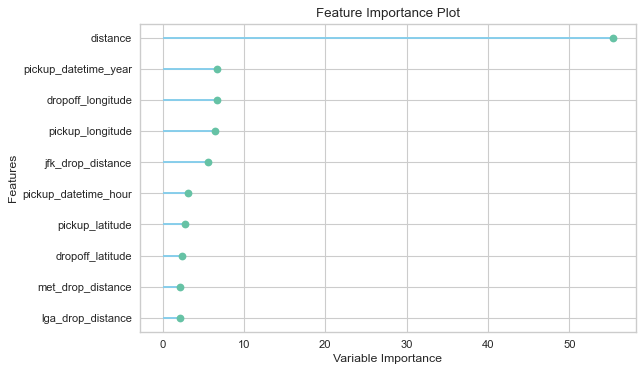

In [15]:
# plot feature importance
exp1.plot_model(catboost, plot="feature", scale=0.8) 
# exp1.plot_model(catboost, plot="feature_all", scale=0.8) 

## Experiment 2

In [17]:
exp2 = RegressionExperiment()

exp2.setup(
    df, 
    target="fare_amount",
    # preprocess=False,
    # fix_imbalance=True,
    # remove_multicollinearity=True,
    # remove_outliers=True,
    # outliers_method="iforest",
    normalize=True,
    # transformation=True,
    # transformation_method="yeo-johnson",
    # log_experiment=True,
    # expirement_name="exp2",
    date_features=["pickup_datetime"],
    create_date_columns=["day", "month", "year", "weekday", "hour"],
    session_id=42,
    n_jobs=4
)

,Description,Value
0,Session id,42
1,Target,fare_amount
2,Target type,Regression
3,Original data shape,"(539486, 13)"
4,Transformed data shape,"(539486, 17)"
5,Transformed train set shape,"(377640, 17)"
6,Transformed test set shape,"(161846, 17)"
7,Numeric features,11
8,Date features,1
9,Preprocess,True


In [18]:
pd.set_option("display.max_columns", None)
exp2.get_config("X_transformed")

,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
137187,-0.385524,-1.045767,-0.929562,-0.368709,-1.347085,-0.045890,-0.444474,-0.518480,-0.066553,-0.527824,-0.448664,0.290106,0.300651,-0.524660,-0.083319,-0.456350
443288,-0.385524,-0.533704,-1.465084,0.212968,0.722646,0.304170,0.360150,1.941844,0.481313,-0.527824,0.420873,-1.175327,-2.493234,1.696293,0.118635,1.287918
249101,0.534530,-1.557830,-0.394041,0.212968,-1.347085,0.236868,0.353181,0.454117,0.653531,-0.527824,-0.536809,0.046615,-0.938103,0.568329,-1.050994,0.540655
4545,-0.538866,-0.021641,0.141481,-0.077870,-0.197234,0.434777,1.022278,0.596020,1.154767,-0.527824,-0.630342,0.387561,-1.071938,0.926888,-1.011511,1.020943
30743,-1.918947,1.002485,1.212525,-0.077870,-0.197234,-0.287334,-0.894710,-0.566682,0.258859,-0.527824,0.101883,0.562839,0.248007,-0.418893,-0.303827,-0.163590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20470,0.381188,0.490422,-0.394041,1.667160,0.837631,0.684661,1.335709,-0.658356,0.068362,2.543964,0.566528,0.506182,0.401077,-0.578820,-0.111130,-0.363079
326484,-0.232181,-1.045767,-0.394041,1.376321,-0.887145,2.626207,0.829726,-0.440997,0.152046,1.008070,1.612969,0.377627,0.142555,-0.368618,-0.302243,-0.233102
519734,1.301242,-0.021641,0.677003,-0.950385,-0.197234,-1.224233,-1.655532,-1.038115,-0.883129,0.240123,-0.346243,0.267098,1.237422,-1.240246,0.867187,-1.333310
518032,0.381188,-0.533704,1.212525,1.376321,1.182586,0.366808,2.186408,-0.605649,-0.050264,-0.527824,1.096625,0.377938,0.386281,-0.588132,-0.050439,-0.463945


In [21]:
exp2_top3_models = exp2.compare_models(
    sort = "RMSE",
    include=["catboost", "xgboost", "lightgbm", "lr"], 
    n_select=3
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.6312,11.9076,3.4489,0.8656,0.2188,0.1712,11.0240
xgboost,Extreme Gradient Boosting,1.6768,12.3045,3.5061,0.8611,0.2224,0.1754,10.2700
lightgbm,Light Gradient Boosting Machine,1.7474,12.6253,3.5514,0.8575,0.2250,0.1824,0.6520
lr,Linear Regression,2.2577,18.2677,4.2720,0.7938,0.2674,0.2228,0.3370


Processing:   0%|          | 0/23 [00:00<?, ?it/s]

In [22]:
exp2_catboost = exp2.create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6424,12.1324,3.4832,0.8638,0.2205,0.1723
1,1.6353,11.4319,3.3811,0.8696,0.2191,0.1732
2,1.6446,13.7424,3.7071,0.8528,0.2210,0.1724
3,1.6477,12.1627,3.4875,0.8640,0.2221,0.1733
4,1.6350,11.4313,3.3810,0.8716,0.2207,0.1731
5,1.6195,11.7970,3.4347,0.8676,0.2195,0.1695
6,1.6007,10.8708,3.2971,0.8731,0.2140,0.1691
7,1.6370,12.3599,3.5157,0.8594,0.2173,0.1696
8,1.6310,12.1994,3.4928,0.8618,0.2181,0.1703


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [76]:
tuned_exp2_catboost, exp2_cb_tuner = exp2.tune_model(exp2_catboost, optimize="Recall", return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8504,0.8725,0.8504,0.8418,0.8381,0.5084,0.5264
1,0.8504,0.8721,0.8504,0.8415,0.8395,0.5149,0.5294
2,0.8543,0.8845,0.8543,0.8462,0.8435,0.5269,0.5421
3,0.8529,0.8838,0.8529,0.8445,0.8418,0.5215,0.5371
4,0.8560,0.8867,0.8560,0.8480,0.8462,0.5362,0.5495
5,0.8527,0.8826,0.8527,0.8443,0.8412,0.5190,0.5355
6,0.8521,0.8802,0.8521,0.8435,0.8412,0.5200,0.5348
7,0.8581,0.8830,0.8581,0.8507,0.8477,0.5394,0.5549
8,0.8519,0.8788,0.8519,0.8433,0.8407,0.5178,0.5334


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
